<a href="https://colab.research.google.com/github/muratcanaydogdu21/cifar10_guided_project/blob/main/guided_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import tensorflow as tf

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
print(f"x_train:{len(x_train)}")
print(f"x_test:{len(x_test)}")

x_train:50000
x_test:10000


In [4]:
print(x_test[789])

[[[100 111 134]
  [ 98 110 132]
  [ 98 109 131]
  ...
  [ 69  89 114]
  [ 67  87 113]
  [ 66  86 111]]

 [[ 98 109 131]
  [ 95 106 128]
  [ 94 105 127]
  ...
  [ 65  85 110]
  [ 64  84 109]
  [ 63  83 107]]

 [[ 94 105 127]
  [ 92 103 125]
  [ 92 103 125]
  ...
  [ 63  83 108]
  [ 62  82 107]
  [ 60  80 105]]

 ...

 [[ 13  27  40]
  [ 12  26  39]
  [ 12  26  39]
  ...
  [  4   6  21]
  [  5   7  22]
  [  4   7  22]]

 [[ 12  24  38]
  [ 14  26  39]
  [  9  21  34]
  ...
  [  3   5  19]
  [  3   5  20]
  [  5   7  22]]

 [[ 14  23  34]
  [ 12  21  31]
  [  9  19  29]
  ...
  [  4   4  17]
  [  4   5  18]
  [  5   5  18]]]


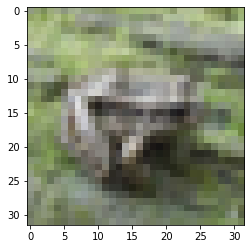

(32, 32, 3)


In [7]:
plt.imshow(x_test[788])
plt.show()
print(x_test[788].shape)

In [8]:
x_val=x_train[40000:]
y_val=y_train[40000:]

x_train=x_train[:40000]
y_train=y_train[:40000]

In [9]:
print(f"x_train:{len(x_train)}")
print(f"x_val:{len(x_val)}")
print(f"x_test:{len(x_test)}")

x_train:40000
x_val:10000
x_test:10000


In [10]:
x_train=x_train/255
x_val=x_val/255
x_test=x_test/255

In [11]:
model=tf.keras.Sequential()

In [12]:
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [13]:
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

In [14]:
model.add(tf.keras.layers.Flatten())

In [15]:
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [16]:
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [17]:
from tensorflow.python import metrics
model.compile(optimizer="adam",
                        loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [18]:
results=model.fit(x_train,y_train,
                   batch_size=128,
                   epochs=50,
                   validation_data=(x_val,y_val))

Epoch 1/50
313/313 [==============================] - 15s 10ms/step - loss: 2.0380 - accuracy: 0.2223 - val_loss: 1.7000 - val_accuracy: 0.3728
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7216 - accuracy: 0.3393 - val_loss: 1.4724 - val_accuracy: 0.4788
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5703 - accuracy: 0.4078 - val_loss: 1.4165 - val_accuracy: 0.5163
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.4627 - accuracy: 0.4484 - val_loss: 1.2496 - val_accuracy: 0.5717
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.3894 - accuracy: 0.4849 - val_loss: 1.1954 - val_accuracy: 0.5834
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.2997 - accuracy: 0.5223 - val_loss: 1.0841 - val_accuracy: 0.6243
Epoch 7/50
313/313 [==============================] - 3s 9ms/step - loss: 1.2328 - accuracy: 0.5524 - val_loss: 1.0467 - val_accuracy: 0.6326
Epoc

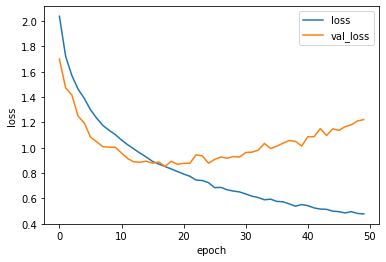

In [20]:
plt.plot(results.history["loss"],label="loss")
plt.plot(results.history["val_loss"],label="val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

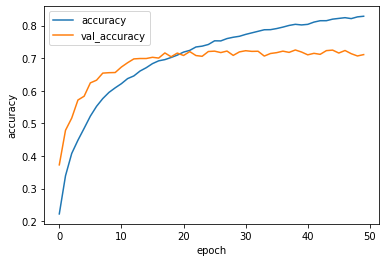

In [21]:
plt.plot(results.history["accuracy"],label="accuracy")
plt.plot(results.history["val_accuracy"],label="val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [23]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2514 - accuracy: 0.7042


[1.2514386177062988, 0.704200029373169]

In [27]:
prediction_result=model.predict(x_test[789].reshape(1,32,32,3))
prediction_result

array([[3.8601321e-04, 6.0902905e-10, 4.7631240e-13, 3.5461979e-15,
        2.4560289e-18, 2.7005382e-19, 8.6448646e-17, 7.4004567e-20,
        9.9961406e-01, 5.4154087e-11]], dtype=float32)

In [28]:
predicted_class=prediction_result.argmax()
predicted_probability=prediction_result.max()

In [29]:
print(f" this image belongs to class{predicted_class} with {predicted_probability} probabilty% ")

 this image belongs to class8 with 0.9996140599250793 probabilty% 
